<a href="https://colab.research.google.com/github/offthetab/ML_homework/blob/main/%D0%9F%D0%A0_5_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavelgrom123123","key":"0b2c7cf3bdd7f85b75f7f545e9f1df19"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download 'imakash3011/customer-personality-analysis'

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 52.5MB/s]


In [ ]:
!unzip customer-personality-analysis.zip

Archive:  customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [ ]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print(data.shape)

(2240, 29)


In [ ]:
data.dropna(inplace=True)

In [ ]:
data["Age"] = 2023-data["Year_Birth"]

data["Children"]=data["Kidhome"]+data["Teenhome"]

data['Education'] = data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')
data['Education'] = data['Education'].replace(['Basic'], 'Under Graduate')

data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'Relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

to_drop = ["ID", "Year_Birth", "Dt_Customer", "Z_CostContact", "Z_Revenue", 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
           'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
data = data.drop(to_drop, axis=1)

data.head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,Response,Age,Children,TotalAcceptedCmp,NumTotalPurchases
0,Post Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,7,0,1,66,0,0,25
1,Post Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,5,0,0,69,2,0,6
2,Post Graduate,Relationship,71613.0,0,0,26,426,49,127,111,21,42,4,0,0,58,0,0,21
3,Post Graduate,Relationship,26646.0,1,0,26,11,4,20,10,3,5,6,0,0,39,1,0,8
4,Post Graduate,Relationship,58293.0,1,0,94,173,43,118,46,27,15,5,0,0,42,1,0,19
5,Post Graduate,Relationship,62513.0,0,1,16,520,42,98,0,42,14,6,0,0,56,1,0,22
6,Post Graduate,Single,55635.0,0,1,34,235,65,164,50,49,27,6,0,0,52,1,0,21
7,Post Graduate,Relationship,33454.0,1,0,32,76,10,56,3,1,23,8,0,0,38,1,0,10
8,Post Graduate,Relationship,30351.0,1,0,19,14,0,24,3,3,2,9,0,1,49,1,0,6
9,Post Graduate,Relationship,5648.0,1,1,68,28,0,6,1,1,13,20,0,0,73,2,1,2


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Marital_Status'] = le.fit_transform(data['Marital_Status'])
data['Education'] =le.fit_transform(data['Education'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(data),columns= data.columns) # нормализованные данные

pca = PCA(n_components=3)
pca.fit(norm_data)
PCA_data = pd.DataFrame(pca.transform(norm_data), columns=(["1","2", "3"]))
PCA_data.describe().T


,count,mean,std,min,25%,50%,75%,max
1,2216.0,-8.016051e-19,0.495597,-0.868052,-0.433829,-0.085418,0.348898,1.376757
2,2216.0,2.605216e-18,0.461433,-1.204424,-0.295718,-0.017729,0.302321,1.282082
3,2216.0,-5.771557e-17,0.354543,-0.760887,-0.238090,-0.055873,0.145879,1.252991


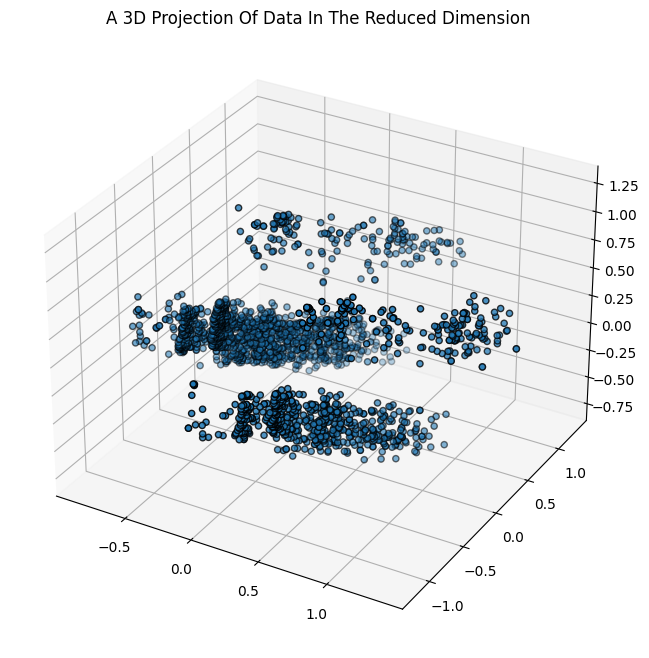

In [ ]:
x =PCA_data["1"]
y =PCA_data["2"]
z =PCA_data["3"]


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, cmap="tab20", marker="o", edgecolors='black')
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

[779.9913456211216, 560.5825863510322, 387.3007171053189, 304.83446122978563, 223.57374417982896, 184.7038923472995, 149.5452951920795, 117.77641152331523]


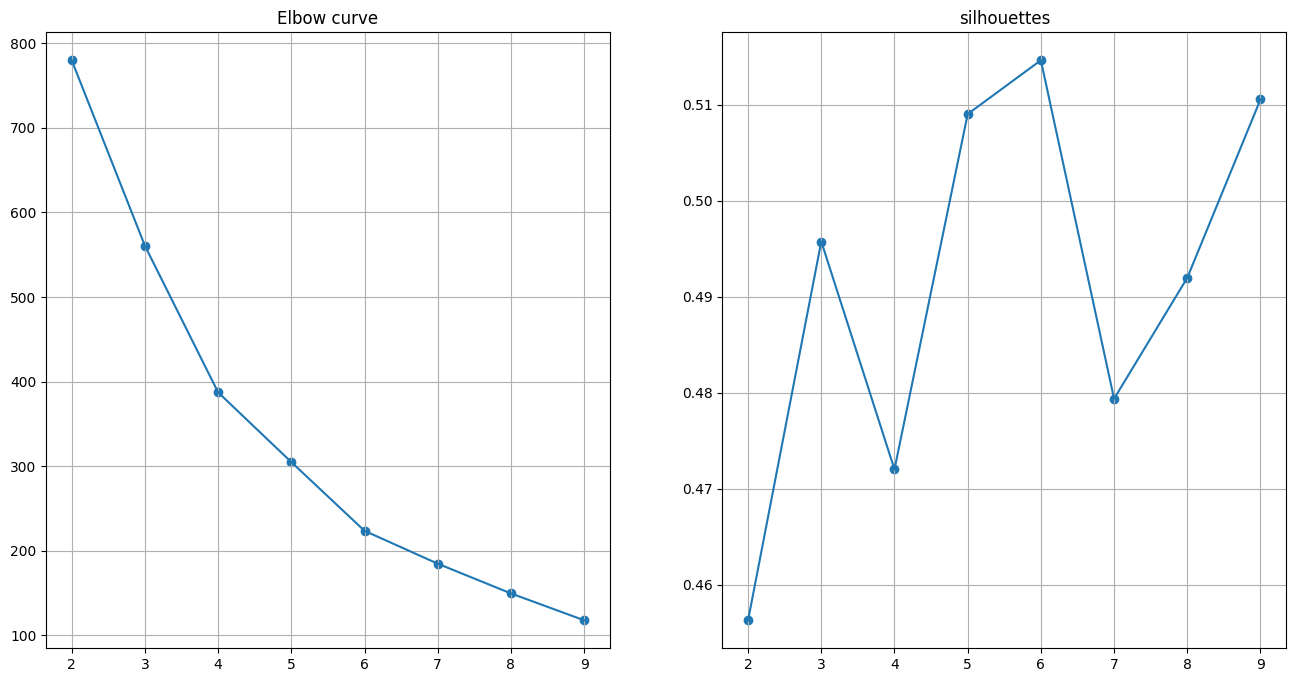

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


distorsions = []
silhouettes = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(PCA_data)
    distorsions.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(PCA_data, kmeans.labels_, metric='euclidean'))

print(distorsions)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].scatter(range(2, 10), distorsions)
ax[0].plot(range(2, 10), distorsions)
ax[0].grid(True)
ax[0].set_title('Elbow curve')

ax[1].scatter(range(2, 10), silhouettes)
ax[1].plot(range(2, 10), silhouettes)
ax[1].grid(True)
ax[1].set_title('silhouettes')

plt.show()

In [ ]:
# K-means

k_means = KMeans(n_clusters=6)
k_means_clusters = k_means.fit_predict(PCA_data)


In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['black', 'borwn', 'blue', 'red', 'yellow', 'green'])

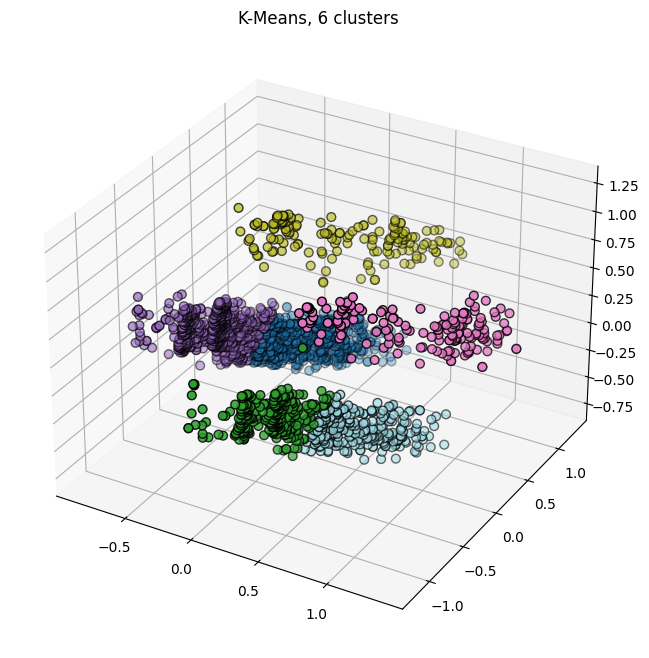

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=k_means_clusters, marker='o', cmap = 'tab20', edgecolors='black')
ax.set_title("K-Means, 6 clusters")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
# DBSCAN

DBScan = DBSCAN(eps=0.2, min_samples=5)
DB = DBScan.fit_predict(PCA_data)

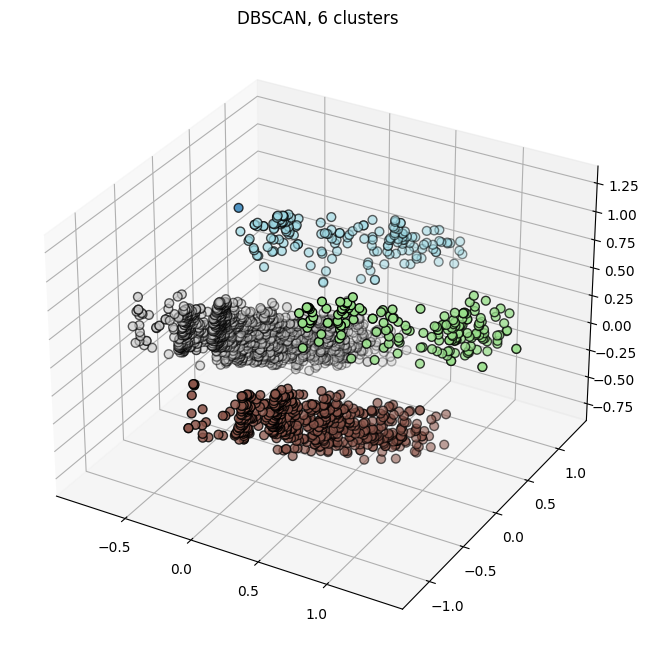

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=DB, marker='o', cmap = 'tab20', edgecolors='black')
ax.set_title("DBSCAN, 6 clusters")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Иерархическая
AgglomerativeClustering_ = AgglomerativeClustering(n_clusters=None, distance_threshold=0.9, linkage='average')
agg_clust = AgglomerativeClustering_.fit_predict(PCA_data)

model = AgglomerativeClustering_.fit(PCA_data)
print(model)


AgglomerativeClustering(distance_threshold=0.9, linkage='average',
                        n_clusters=None)


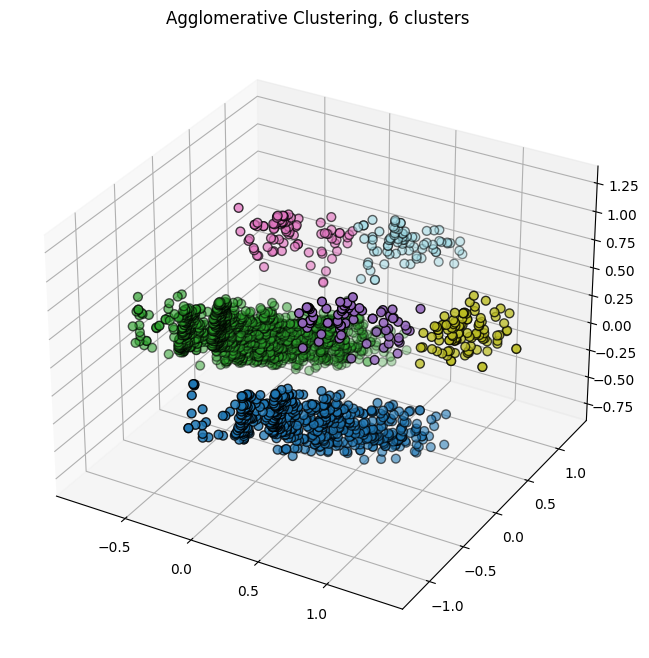

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=agg_clust, marker='o', cmap = 'tab20', edgecolors='black')
ax.set_title("Agglomerative Clustering, 6 clusters")
plt.show()

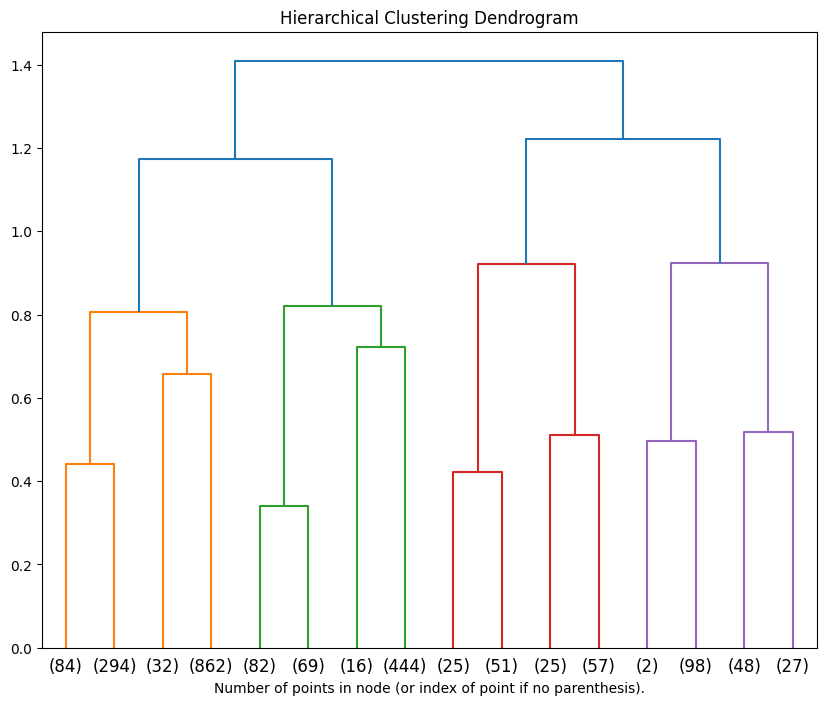

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# отрисовка дендрограммы

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(10,8))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
# Для EDA анализа по построенным моделям надо воспльзоаться
# scaler.inverse_transform(scaled_data)
# затем проводить исследование классов